## BOSCH Data from Markus

In [1]:
import numpy as np
from stareg.star_model import  StarModel
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
DATAPATH = "..\\..\\Data\\"

In [2]:
df = pd.read_csv(DATAPATH+"\\Bosch_Markus_0904.csv")

### Fit $\Psi_d$

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
----Iteration 1-----
-----v_old = 0------
-----v_new = 0------ 

--PIRLS converged!--


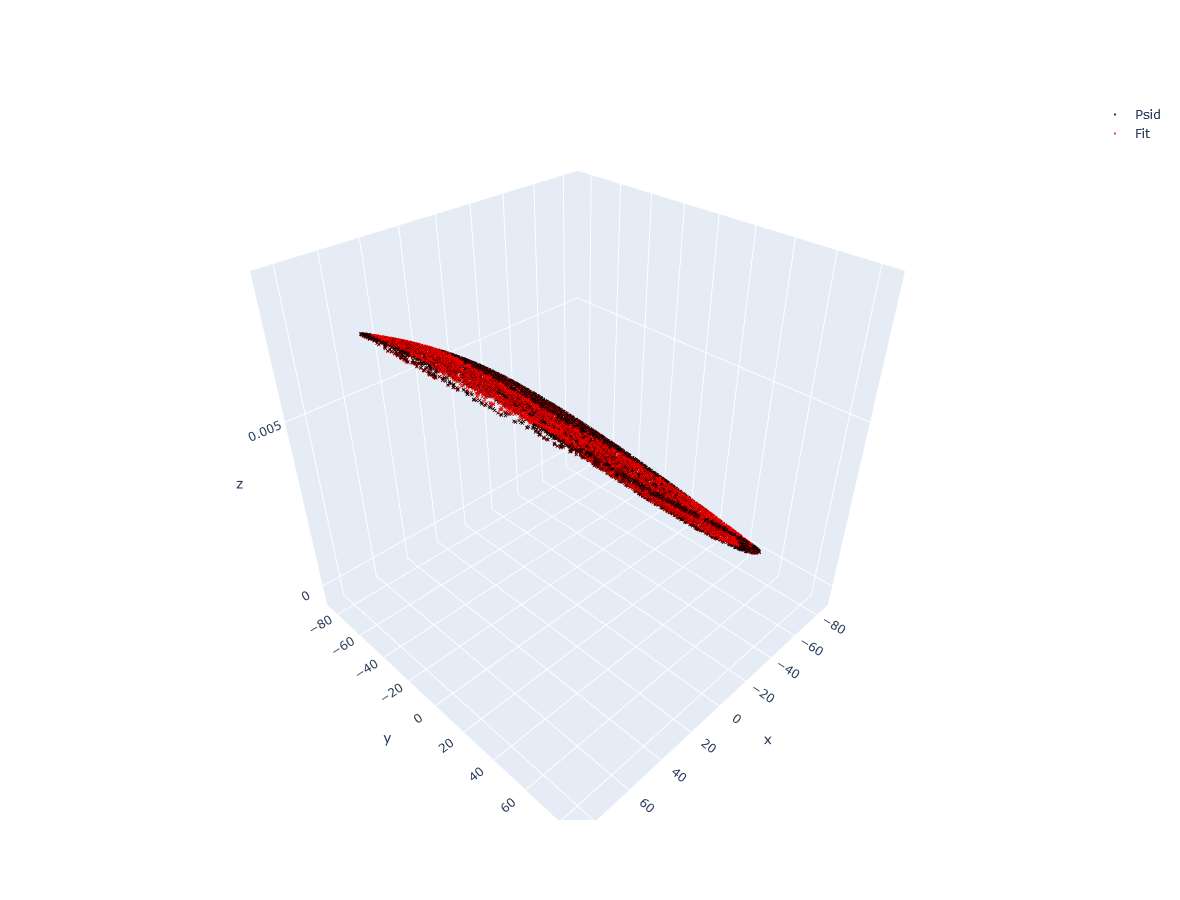

In [3]:
m = ( #("s(1)", "inc", 10, (0.1, 1000), "equidistant"), 
      #("s(2)", "inc", 10, (0.1, 1000), "equidistant"), 
      ("t(1,2)", "none", (6,6), (0.1, 1000), "equidistant"), )

M = StarModel(description=m)
M.fit(X=df[["id", "iq"]].values, y=df["Psid"].values, plot_=0, verbose=True)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=df["Psid"],name="Psid", mode="markers", marker=dict(size=1, symbol="x", color="black")))
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=M.basis @ M.coef_,name="Fit", mode="markers", marker=dict(size=1, symbol="x", color="red")))
fig.update_layout(height=900)

In [5]:
from sklearn.metrics import mean_squared_error

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
----Iteration 1-----
-----v_old = 0------
-----v_new = 0------ 

--PIRLS converged!--
MSE =  6.621022557875582e-11


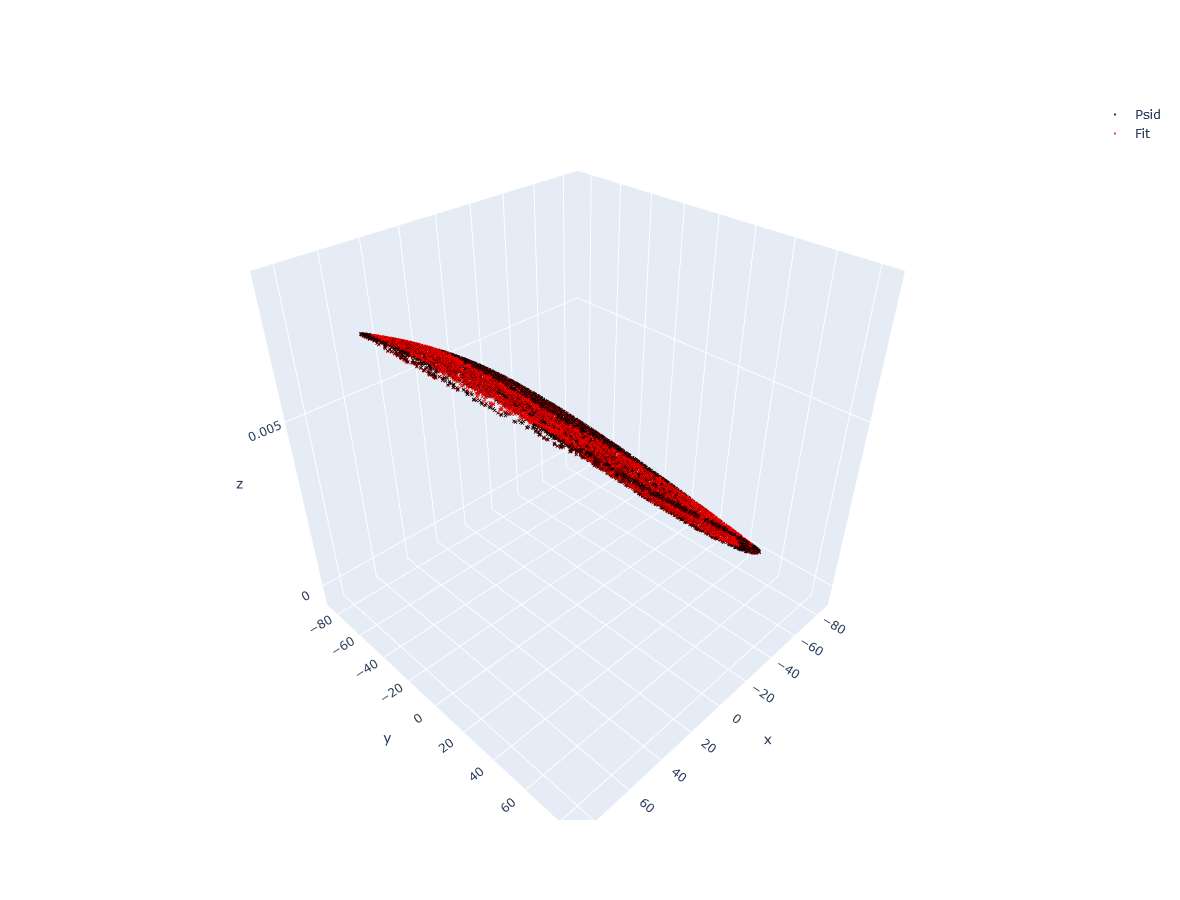

In [6]:
md = ( #("s(1)", "inc", 10, (0.1, 1000), "equidistant"), 
      #("s(2)", "inc", 10, (0.1, 1000), "equidistant"), 
      ("t(1,2)", "none", (6,6), (0.1, 1000), "equidistant"), )

Md = StarModel(description=md)
Md.fit(X=df[["id", "iq"]].values, y=df["Psid"].values, plot_=0, verbose=True)
print("MSE = ", mean_squared_error(Md.basis @ Md.coef_, df["Psid"]))
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=df["Psid"],name="Psid", mode="markers", marker=dict(size=1, symbol="x", color="black")))
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=Md.basis @ Md.coef_,name="Fit", mode="markers", marker=dict(size=1, symbol="x", color="red")))
fig.update_layout(height=900)

### Fit $\Psi_q$

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
----Iteration 1-----
-----v_old = 0------
-----v_new = 0------ 

--PIRLS converged!--
MSE =  4.7644466483119906e-11


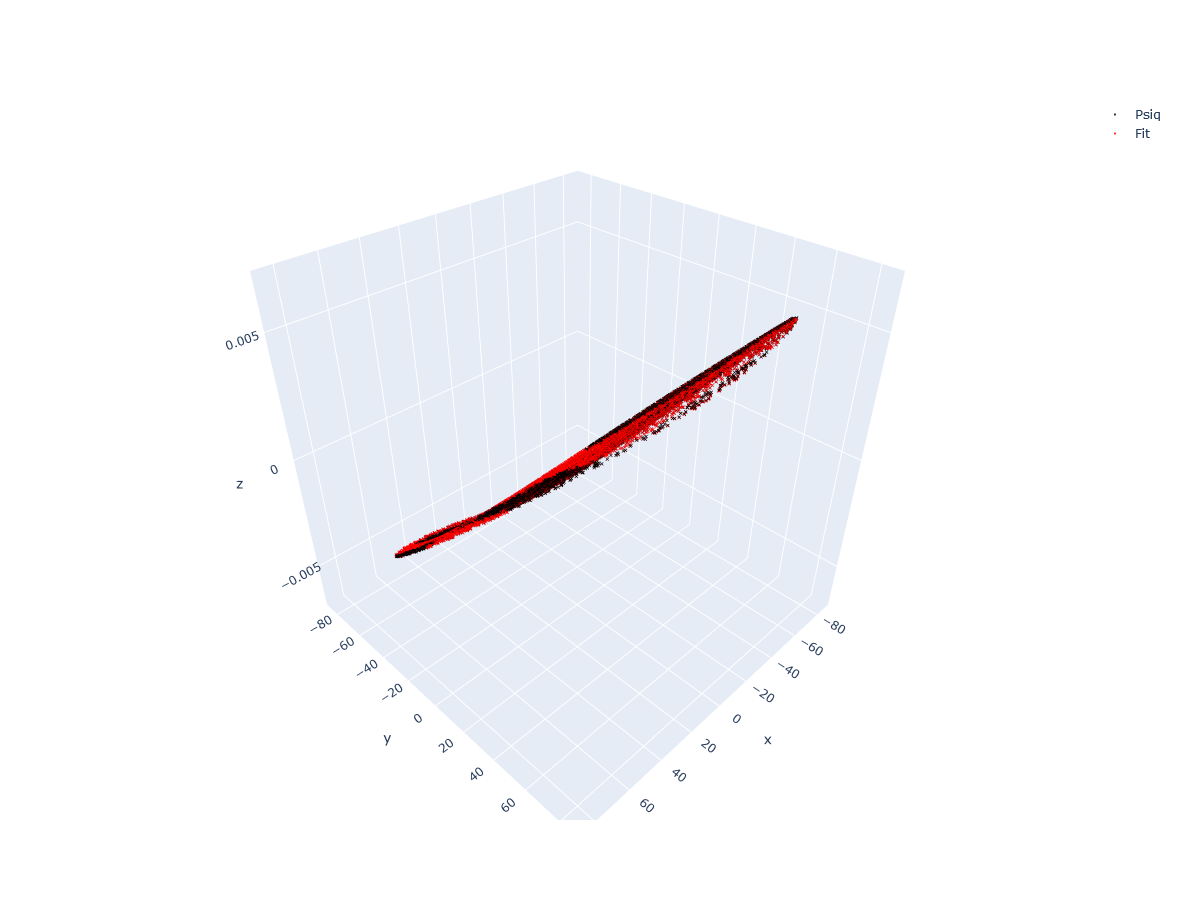

In [7]:
mq = ( #("s(1)", "inc", 10, (0.1, 1000), "equidistant"), 
      #("s(2)", "inc", 10, (0.1, 1000), "equidistant"), 
      ("t(1,2)", "none", (6,6), (0.1, 1000), "equidistant"), )

Mq = StarModel(description=mq)
Mq.fit(X=df[["id", "iq"]].values, y=df["Psiq"].values, plot_=0, verbose=True)
print("MSE = ", mean_squared_error(Mq.basis @ Mq.coef_, df["Psiq"]))
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=df["Psiq"],name="Psiq", mode="markers", marker=dict(size=1, symbol="x", color="black")))
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=Mq.basis @ Mq.coef_,name="Fit", mode="markers", marker=dict(size=1, symbol="x", color="red")))
fig.update_layout(height=900)